# In Class Work: Vaccine Distribution with Fairness: Parameterize

###  Bus 36109 "Advanced Decision Modeling with Python", Don Eisenstein
Don Eisenstein &copy; Copyright 2023, University of Chicago 



A vaccine is being produced at different manufacturing Plants to be distributed across the United States to various Hospitals. Our task is to determine the quantities each Plant should ship to each Hospital.

There are 6 manufacturing facilities, each with a limited weekly capacity (in cases) of vaccine doses. The location of each facility is represented as `(x, y)` map coordinates. 

| Facility | Location   | Capacity |
| -------- | :----------: | ------: |
| Plant 1  | (123, 210) | 200    |
| Plant 2  | (40, 71)   | 50    |
| Plant 3  | (21, 185)  | 150    |
| Plant 4  | (129, 57)  | 40    |
| Plant 5  | (300, 12)  | 100    |
| Plant 6  | (281, 190) | 100    |

There are ten hospital networks in need of vaccines. Their weekly quantities needed (in cases) and `(x, y)` map coordinates are shown below.

| Facility | Location   | Demand |
| -------- | :----------: | ------: |
| Hospital 1  | (41, 21) | 50    |
| Hospital 2  | (129, 44)   | 75    |
| Hospital 3  | (61, 210)  | 121    |
| Hospital 4  | (78, 47)  | 231    |
| Hospital 5  | (12, 90)  | 147    |
| Hospital 6  | (70, 250) | 190    |
| Hospital 7  | (63, 194)   | 100    |
| Hospital 8  | (199, 28)  | 151    |
| Hospital 9  | (351, 7)  | 49    |
| Hospital 10  | (222, 163)  | 172    |

Assumption:  You can assume, as this data indicates, that the total Plant capacity is no greater than the total Hospital demand.

We estimate our cost of transportation by considering the *Rectilinear* distance between each Plant and Hospital.  Rectilinear travel restricts movement along the horizontal (x) and vertical (y) axes. It is commonly used to approximate travel along a road grid. 

The transportation cost is $1 per vaccine case traveling one unit of our map distance. The rectilinear distance between two points `(x_1, y_1)` and `(x_2, y_2)` is `abs(x_2 - x_1) + abs(y_2 - y_1)`.   The Python `abs` function returns the absolute value of a number.

For example, the distance between `(0, 0)` and `(1, 1)` is `abs(1 - 0) + abs(1 - 0) = 2`, and transporting `100` vaccine cases would therefore cost `100 cases * 2 distance units * $1/(case-distance) = $200`. 

Each manufacturing plant seeks to send as many cases as possible in order to meet hospital demand. Because vaccines are extremely valuable, hospitals should not receive any additional cases exceeding their immediate requirements.  Each manufacturing plant can ship vaccines to multiple hospitals, and each hospital can receive vaccines from multiple manufacturing plants. You can assume that the number of vaccine cases sent and received is always an integer number.

Your model should answer the following question:

**What is the optimal allocation of vaccine cases to hospitals that minimizing total transportation cost, without exceeding the requirements of any hospital?   In other words, how many cases of vaccines should each manufacturing plant send to each hospital?** 

Follow the notebook to walk you through the solution in parts.  Insert your answer to each part into the notebook below the question for each part.  

In [10]:
# === SETUP ===
import pulp
import os
from pprint import pprint

# Portable solver setup, to allow work locally (ARM64 architecture) as well as in JupyterHub
from pulp import COIN_CMD
if os.path.exists('/opt/homebrew/opt/cbc/bin/cbc'):
    solver = COIN_CMD(path='/opt/homebrew/opt/cbc/bin/cbc', msg=0)
else:
    solver = pulp.PULP_CBC_CMD(msg=0)

## Fairness

Let `P` be a lower bound on the percent of demand met by each hospital.  That is, `P` is the minimum percent of demand met across all hospitals. 

We treat `P` as a parameter.  That is `P` is NOT a variable, it is a constant that we will set and then run the optimization. 

We will need a constraint for each Hospital to ensure that the percent of demand met is at least `P`. That is for some Hospital `j`:

```python
plant_1_hospital_j + plant_2_hospital_j + ...   >= P * hospital_demand_j
```

In [1]:
import pulp

# Your Solution

Insert your answer to each part into this notebook

**1. In broad terms, what are the variables, objective and constraints of this problem? You don't need to list the entire formulation. Just describe the structure/characteristics of your model.**

#### Solution to Part 1

- Variables:
  - Plant_i_Hospital_j :  number of vaccine cases to ship from Plant i to Hospital j
  
- Objective:  Minimize Sum of Travel Cost/Case_i_j * Plant_i_Hospital_j

- Constraints
  - For each Plant i:      Sum Plant_i_Hospital_j == Supply Plant_i  for all j
  - For each Hospital j:      Sum Plant_i_Hospital_j <= Demand Hospital_j  for all i


Now, translate your model into Python so you can solve it.

**2.  Set up a Python List called `plants` to store the information about the plants.   
Each element of the List should be a Dictionary that will have Keys `name`, `capacity`, `x` and `y` with associated data from the table above.**


In [2]:
# Solution to part 2.
#
plants = [
    {'name': 'plant_1',
     'x': 123,
     'y': 210,
     'capacity': 200
    },
    {'name': 'plant_2',
     'x': 40,
     'y': 71,
     'capacity': 50
    },
    {'name': 'plant_3',
     'x': 21,
     'y': 185,
     'capacity': 150
    },
    {'name': 'plant_4',
     'x': 129,
     'y': 57,
     'capacity': 40
    },
    {'name': 'plant_5',
     'x': 300,
     'y': 12,
     'capacity': 100
    },
    {'name': 'plant_6',
     'x': 281,
     'y': 190,
     'capacity': 100
    }
]

**3.  Now do a similar thing for hospitals, where each element of a `hospitals` List will be a Dictionary with keys `name`, `demand`, `x` and `y` with associated data fromt the table above.**

In [3]:
# Solution to Part 3.
#
hospitals = [
    {'name': 'hospital_1',
     'x': 41,
     'y': 21,
     'demand': 50
    },
    {'name': 'hospital_2',
     'x': 129,
     'y': 44,
     'demand': 75
    },
    {'name': 'hospital_3',
     'x': 61,
     'y': 210,
     'demand': 121
    },
    {'name': 'hospital_4',
     'x': 78,
     'y': 47,
     'demand': 231
    },
    {'name': 'hospital_5',
     'x': 12,
     'y': 90,
     'demand': 147
    },
    {'name': 'hospital_6',
     'x': 70,
     'y': 250,
     'demand': 190
    },
    {'name': 'hospital_7',
     'x': 63,
     'y': 194,
     'demand': 100
    },
    {'name': 'hospital_8',
     'x': 199,
     'y': 28,
     'demand': 151
    },
    {'name': 'hospital_9',
     'x': 351,
     'y': 7,
     'demand': 49
    },
    {'name': 'hospital_10',
     'x': 222,
     'y': 163,
     'demand': 172
    },
]

**4. Create a PuLP LpProblem object and store it in the variable `model`.** 

In [4]:
# Solution to Part 4
#
model = pulp.LpProblem('VaccineDistribution', pulp.LpMinimize)

**5. Create a Dictionary `lp_variables` and store in it each PuLP variable.  Each key in the `lp_variables` Dictionary should be a Tuple listing the plant name and hospital name** 

In [5]:
# Solution to Part 5
#
# Our decision variables are the quantities being transported from each plant to each hospital
# Create all our decision variables and store them in a dictionary
lp_variables = {}
for plant in plants:
    for hospital in hospitals:
        # Create a dictionary entry referencing the decision variable for this plant-hospital pair
        lp_variables[(plant['name'], hospital['name'])] = pulp.LpVariable(f"{plant['name']}_{hospital['name']}", cat='Continuous', lowBound=0)


**6. Add your objective function to your `model`**

In [6]:
# Solution to Part 6
#
# Our cost objective is the sum of transportation costs from each plant to each hospital
# Iterate through all variables created and add them to our cost 
transportation_cost_objective = 0
for plant in plants:
    for hospital in hospitals:
        # Calculate the distance between the plant and hospital
        distance_cost = abs(plant['x'] - hospital['x']) + abs(plant['y'] - hospital['y'])
        
        # Add the distance cost multiplied by the variable value to our cost objective
        transportation_cost_objective += lp_variables[(plant['name'], hospital['name'])] * distance_cost
        
# Add the total transportation cost to our model as its minimization objective
model += transportation_cost_objective, 'Minimize transportation cost'


**7. Add the constraints to your `model`**

In [7]:
#. Solution to Part 7
#
# Since total plant capacity is less than hospital capacity, every plant must 
# send all its vaccine to hospitals
for plant in plants:
    # Initialize a variable tracking the doses allocated from each manufacturing plant 
    const = '' 
    
    for hospital in hospitals:
        # Add the plant-hospital decision variable to our total plant allocation 
        const += lp_variables[(plant['name'], hospital['name'])]
        
    # Now that we've looped through all hospitals for this plant, we add this constraint to our model
    model += const == plant['capacity'], f"{plant['name']}_capacity"
    
# The cases of vaccine into every hospital cannot exceed its demand 
for hospital in hospitals:
    # Initialize a variable tracking the doses received at each hospital
    const = ''
    
    for plant in plants:
        # Add the plant-hospital decision variable to our total hospital received amount
        const += lp_variables[(plant['name'], hospital['name'])]
        
    # Now that we've looped through all plants for this hospital, we add this constraint to our model
    model += const <= hospital['demand'], f"{hospital['name']}_demand"
  

**8. Display your model with `print(model)`, check that all is OK**

In [8]:
# Solution to Part 8
#
print(model)

VaccineDistribution:
MINIMIZE
271*plant_1_hospital_1 + 146*plant_1_hospital_10 + 172*plant_1_hospital_2 + 62*plant_1_hospital_3 + 208*plant_1_hospital_4 + 231*plant_1_hospital_5 + 93*plant_1_hospital_6 + 76*plant_1_hospital_7 + 258*plant_1_hospital_8 + 431*plant_1_hospital_9 + 51*plant_2_hospital_1 + 274*plant_2_hospital_10 + 116*plant_2_hospital_2 + 160*plant_2_hospital_3 + 62*plant_2_hospital_4 + 47*plant_2_hospital_5 + 209*plant_2_hospital_6 + 146*plant_2_hospital_7 + 202*plant_2_hospital_8 + 375*plant_2_hospital_9 + 184*plant_3_hospital_1 + 223*plant_3_hospital_10 + 249*plant_3_hospital_2 + 65*plant_3_hospital_3 + 195*plant_3_hospital_4 + 104*plant_3_hospital_5 + 114*plant_3_hospital_6 + 51*plant_3_hospital_7 + 335*plant_3_hospital_8 + 508*plant_3_hospital_9 + 124*plant_4_hospital_1 + 199*plant_4_hospital_10 + 13*plant_4_hospital_2 + 221*plant_4_hospital_3 + 61*plant_4_hospital_4 + 150*plant_4_hospital_5 + 252*plant_4_hospital_6 + 203*plant_4_hospital_7 + 99*plant_4_hospital_8 + 27

**9. Solve your optimization model and print its status and the optimal objective function value.**

In [11]:
# Solution to Part 9 
#
model.solve(solver)
print("Status:", pulp.LpStatus[model.status])
print("Obj function value:", model.objective.value())

Status: Optimal
Obj function value: 44930.0


**10. Output the value of each of your variables at optimality.**

In [12]:
# Solution to Part 10
#
# You can uncomment the following code snippet for convenience in printing your final answer:
for v in model.variables():
    if v.varValue > 0:
        print(v, v.varValue)

plant_1_hospital_3 71.0
plant_1_hospital_6 129.0
plant_2_hospital_5 50.0
plant_3_hospital_3 50.0
plant_3_hospital_7 100.0
plant_4_hospital_2 40.0
plant_5_hospital_8 51.0
plant_5_hospital_9 49.0
plant_6_hospital_10 100.0


**11. Use Python to list each Hospital's Demand and total supply of Vaccine sent from your solution.**

HINT:  `model.constraints` returns you a dictionary.   You can inspect the keys of the dictionary with `model.constraints.keys()`.  Each key is the name of a constraint -- the name you provided when you created the constraint.  

So, for example if you used the name `hospital_demand_1` for the supply/demand constraint for hospital 1 then you can retrieve the shortfall, or slack, in the solution with `model.constraints['hospital_demand_1'].slack` 



In [13]:
# Solution for Part 11
#
for hospital in hospitals:
    name =  hospital['name']
    demand = hospital['demand']
    constraint_name = f"{name}_demand"
    slack = model.constraints[constraint_name].slack
    print(f"Hospital {name:<15}    supply: {demand-slack:>8}     demand:{demand:>8}    shorfall:{slack:>8}  percent:{(demand-slack)/demand:>6.2f}")


Hospital hospital_1         supply:      0.0     demand:      50    shorfall:    50.0  percent:  0.00
Hospital hospital_2         supply:     40.0     demand:      75    shorfall:    35.0  percent:  0.53
Hospital hospital_3         supply:    121.0     demand:     121    shorfall:    -0.0  percent:  1.00
Hospital hospital_4         supply:      0.0     demand:     231    shorfall:   231.0  percent:  0.00
Hospital hospital_5         supply:     50.0     demand:     147    shorfall:    97.0  percent:  0.34
Hospital hospital_6         supply:    129.0     demand:     190    shorfall:    61.0  percent:  0.68
Hospital hospital_7         supply:    100.0     demand:     100    shorfall:    -0.0  percent:  1.00
Hospital hospital_8         supply:     51.0     demand:     151    shorfall:   100.0  percent:  0.34
Hospital hospital_9         supply:     49.0     demand:      49    shorfall:    -0.0  percent:  1.00
Hospital hospital_10        supply:    100.0     demand:     172    shorfall:    7

### Add new P constraints

In [15]:
# Let's set a minimum demand fulfillment constraint (P) of 25%
P = 0.25

for hospital in hospitals:
    # Initialize a variable tracking the doses received at each hospital
    const = None
    
    for plant in plants:
        # Add the plant-hospital decision variable to our total hospital received amount
        const += lp_variables[(plant['name'], hospital['name'])]
        
    # Now that we've looped through all plants for this hospital, we add this constraint to our model
    model += const >= P * hospital['demand'], f"{hospital['name']}_percent"

PulpError: overlapping constraint names: hospital_1_percent

In [16]:
print(model)

VaccineDistribution:
MINIMIZE
271*plant_1_hospital_1 + 146*plant_1_hospital_10 + 172*plant_1_hospital_2 + 62*plant_1_hospital_3 + 208*plant_1_hospital_4 + 231*plant_1_hospital_5 + 93*plant_1_hospital_6 + 76*plant_1_hospital_7 + 258*plant_1_hospital_8 + 431*plant_1_hospital_9 + 51*plant_2_hospital_1 + 274*plant_2_hospital_10 + 116*plant_2_hospital_2 + 160*plant_2_hospital_3 + 62*plant_2_hospital_4 + 47*plant_2_hospital_5 + 209*plant_2_hospital_6 + 146*plant_2_hospital_7 + 202*plant_2_hospital_8 + 375*plant_2_hospital_9 + 184*plant_3_hospital_1 + 223*plant_3_hospital_10 + 249*plant_3_hospital_2 + 65*plant_3_hospital_3 + 195*plant_3_hospital_4 + 104*plant_3_hospital_5 + 114*plant_3_hospital_6 + 51*plant_3_hospital_7 + 335*plant_3_hospital_8 + 508*plant_3_hospital_9 + 124*plant_4_hospital_1 + 199*plant_4_hospital_10 + 13*plant_4_hospital_2 + 221*plant_4_hospital_3 + 61*plant_4_hospital_4 + 150*plant_4_hospital_5 + 252*plant_4_hospital_6 + 203*plant_4_hospital_7 + 99*plant_4_hospital_8 + 27

In [20]:
model.solve(solver)
print("Status:", pulp.LpStatus[model.status])
print("Obj function value:", model.objective.value())
print("\n")

for hospital in hospitals:
    name =  hospital['name']
    demand = hospital['demand']
    constraint_name = f"{name}_demand"
    slack = model.constraints[constraint_name].slack
    print(f"Hospital {name:<15}    supply: {demand-slack:>8}     demand:{demand:>8}    shorfall:{slack:>8}  percent:{(demand-slack)/demand:>6.2f}")

Status: Optimal
Obj function value: 46808.5


Hospital hospital_1         supply:     12.5     demand:      50    shorfall:    37.5  percent:  0.25
Hospital hospital_2         supply:    19.75     demand:      75    shorfall:   55.25  percent:  0.26
Hospital hospital_3         supply:    121.0     demand:     121    shorfall:    -0.0  percent:  1.00
Hospital hospital_4         supply:    57.75     demand:     231    shorfall:  173.25  percent:  0.25
Hospital hospital_5         supply:    36.75     demand:     147    shorfall:  110.25  percent:  0.25
Hospital hospital_6         supply:    92.25     demand:     190    shorfall:   97.75  percent:  0.49
Hospital hospital_7         supply:    100.0     demand:     100    shorfall:    -0.0  percent:  1.00
Hospital hospital_8         supply:     51.0     demand:     151    shorfall:   100.0  percent:  0.34
Hospital hospital_9         supply:     49.0     demand:      49    shorfall:    -0.0  percent:  1.00
Hospital hospital_10        supply: 

In [30]:
# Iterate over different P values
P_list = []
Obj_value_list = []
num_steps = 50

for step in range(num_steps+1):
    # Populate P_list with 0%, 5%, 10%, ...
    P = step/num_steps
    P_list.append(P)

    # Remove the previous/existing P constraints
    for hospital in hospitals:
        constraint_name = f"{hospital['name']}_percent"
        if (constraint_name in model.constraints):
            del model.constraints[constraint_name]

    # Add the new P constraints
    for hospital in hospitals:
        # Initialize a variable tracking the doses received at each hospital
        const = None
        
        for plant in plants:
            # Add the plant-hospital decision variable to our total hospital received amount
            const += lp_variables[(plant['name'], hospital['name'])]
            
        # Now that we've looped through all plants for this hospital, we add this constraint to our model
        model += const >= P * hospital['demand'], f"{hospital['name']}_percent"
    
    # Populate Obj_value_list with the total transport cost given each P
    model.solve(solver)
    if (pulp.LpStatus[model.status] == 'Optimal'):
        Obj_value_list.append(model.objective.value())
    else:
        Obj_value_list.append(None)

print('P_list:', P_list)
print('Obj value list:', Obj_value_list)

P_list: [0.0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2, 0.22, 0.24, 0.26, 0.28, 0.3, 0.32, 0.34, 0.36, 0.38, 0.4, 0.42, 0.44, 0.46, 0.48, 0.5, 0.52, 0.54, 0.56, 0.58, 0.6, 0.62, 0.64, 0.66, 0.68, 0.7, 0.72, 0.74, 0.76, 0.78, 0.8, 0.82, 0.84, 0.86, 0.88, 0.9, 0.92, 0.94, 0.96, 0.98, 1.0]
Obj value list: [44930.0, 45003.3, 45076.600000000006, 45149.9, 45223.2, 45296.5, 45380.67999999999, 45522.46000000001, 45664.24, 45820.520000000004, 46102.8, 46385.08, 46667.36, 47080.2, 47739.03999999999, 48545.399999999994, 49405.0, 50660.840000000004, 52053.36, 53445.88, 54838.4, 56259.04, 57683.28, 59107.520000000004, 60531.76, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]


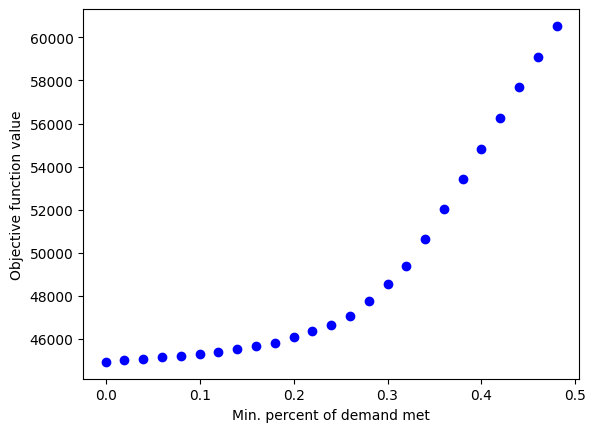

In [31]:
import matplotlib.pyplot as plt
plt.plot(P_list, Obj_value_list, 'bo')
plt.ylabel('Objective function value')
plt.xlabel('Min. percent of demand met')
plt.show()